In [1]:
# setup core dependencies 
import os
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

[trimesh_main]
[get_ShapeNet_paths]
[generate_images_from_mesh]
(9, 512, 512, 3)


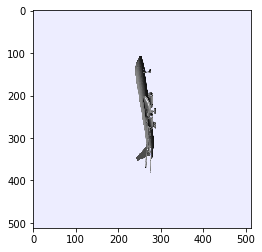

In [2]:
#load custom functions
%run preprocess.py

#import caltech_256
X=constuct_input_matrix("Renders");
print(X.shape)

# get data and shape
input_data=X
input_shape=np.shape(input_data)

# display sample from data
plt.imshow(random.choice(input_data))

In [3]:
# setup graph session
sess = tf.Session()

# encoder portion of network
X=tf.constant(input_data,name='input',dtype=tf.float32)
C_0 = tf.layers.conv2d(X, 1, 7)
P_0 = tf.layers.max_pooling2d(C_0, 1, 3)

C_1 = tf.layers.conv2d(P_0, 1, 3)
P_1 = tf.layers.max_pooling2d(C_1, 1, 3)

C_2 = tf.layers.conv2d(P_1, 1, 3)
P_2 = tf.layers.max_pooling2d(C_2, 1, 3)

C_3 = tf.layers.conv2d(P_2, 1, 3)
P_3 = tf.layers.max_pooling2d(C_3, 1, 3)

C_4 = tf.layers.conv2d(P_3, 1, 3)
P_4 = tf.layers.max_pooling2d(C_4, 1, 3)

FC=tf.contrib.layers.fully_connected(P_4, 1024)

In [ ]:
# decoder
#C_0 = tf.layers.conv3d()

In [ ]:
# serialize graph for tensorboard
writer = tf.summary.FileWriter("./log/")
writer.add_graph(sess.graph)

# 
tf.summary.image("./images",C_0)